# Mapeando el Universo



## Análisis y Curación

 **1 - Análisis general**
 
 * Describir el conjunto de datos. Tratamiento de datos faltantes, outliers, datos repetidos.
 * Considerando el objetivo pricipal de la mentoría, cuáles creen que serían las variables más importantes a considerar?
 * Implementar herramientas en pos de la reproducibilidad de resultados.
 
**2 - Análisis estadístico** 
  * Nos ha contado el especialista que del proceso de adquisición de los mismos se asegura que los datos son correctos y/o completos para aquellos objetos que tienen Magnitudes Pretosian en la banda r entre 14.5 y 17.77. Incluyan esta selección en su análisis.
  * Explorar la base de datos en búsqueda de datos repetidos, en caso de hallarlos elegir la estrategia para su limpieza.
  * Dado que los datos son recolectados a través de mapeos sucesivos del cielo es posible que una galaxia sea observada más de una vez, y en cada observación se le asigne un ID diferente. Propongan una idea para defectar la base de datos de este problema.
       * **Extra**: el especialista en datos no confía en objetos que tengan una separación angular con otro objeto menor a 1" de arco. Intenten limpiar los datos empleando este criterio.
  * Propongan una estrategia para tratar los datos faltantes (en algunas columnas los datos faltantes fueron sustituidos por valores extremos). Quitar o imputar?. Calcular los estadísticos de las distribuciones resultantes.
  * Añadir los campos con los colores calculados tanto para magnitudes petrosian como magnitudes model.
  * En función de las correlaciones observadas en el práctico anterior, y con respecto a nuestra variable objetivo, propongan qué variables se podría excluir del dataset. 
  * Guardar el dataset "limpio" y generar un archivo README que contenga todos los pasos implementados en la curación de los datos.
  * Armen un contenedor de docker con las versiones exactas de todas las bibliotecas utilizadas.

### Lectura de datos

Esto es una manera, pueden utilizar las que más les convenga

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

You should consider upgrading via the 'D:\Mono\Desktop\astrodatos-master\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'D:\Mono\Desktop\astrodatos-master\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'D:\Mono\Desktop\astrodatos-master\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'D:\Mono\Desktop\astrodatos-master\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
filename = "dataset/DiploDatos.csv"
df = pd.read_csv(filename,index_col=0)


In [5]:
df['modelColor_ug'] = df['modelMag_u'] - df['modelMag_g']
df['modelColor_gr'] = df['modelMag_g'] - df['modelMag_r']
df['modelColor_ri'] = df['modelMag_r'] - df['modelMag_i']
df['modelColor_iz'] = df['modelMag_i'] - df['modelMag_z']
df['petroColor_ug'] = df['petroMag_u'] - df['petroMag_g']
df['petroColor_gr'] = df['petroMag_g'] - df['petroMag_r']
df['petroColor_ri'] = df['petroMag_r'] - df['petroMag_i']
df['petroColor_iz'] = df['petroMag_i'] - df['petroMag_z']

### Uniendo dataframes

Vamos a ir un poco más allá y vamos a unir la tabla anterior con otra donde para algunas de las galaxias la gente a votado si se corresponde con una galaxia espiral, eliptica o irregular.

In [6]:
filename = 'dataset/DiploDatos_Zoo.csv'
zoo = pd.read_csv(filename,index_col=0)
dd = df.join(zoo)
dd

,z,zErr,zWarning,subClass,velDisp,velDispErr,ra,dec,raErr,decErr,...,modelColor_gr,modelColor_ri,modelColor_iz,petroColor_ug,petroColor_gr,petroColor_ri,petroColor_iz,spiral,elliptical,uncertain
specObjID,,,,,,,,,,,,,,,,,,,,,
957075158303008768,0.012095,0.000006,0,STARBURST,60.39996,30.544140,197.448850,4.249896,0.011085,0.011415,...,0.25431,0.09500,0.11706,0.79000,0.35837,0.15143,0.10247,0.0,0.0,1.0
957066087332079616,0.141718,0.000031,0,NaN,217.80020,12.076850,197.458925,4.451149,0.009319,0.007280,...,1.07714,0.45090,0.35530,2.11901,1.03352,0.43049,0.27852,0.0,0.0,1.0
957065537576265728,0.140137,0.000023,0,NaN,138.90830,13.126220,197.473340,4.417710,0.007592,0.008524,...,0.85273,0.41891,0.31316,1.07275,0.76730,0.36148,0.22301,1.0,0.0,0.0
957066911965800448,0.066672,0.000016,0,NaN,241.28300,7.109093,197.583262,4.300230,0.003696,0.003337,...,0.92406,0.42804,0.32709,1.90482,0.94006,0.41266,0.26840,0.0,1.0,0.0
957067186843707392,0.183667,0.000007,0,STARFORMING,118.87630,22.979400,197.601252,4.397977,0.023678,0.015545,...,0.58647,0.35715,0.14667,1.04384,0.58365,0.34532,-0.00752,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957077632204171264,0.150921,0.000034,0,NaN,181.48450,11.121100,197.172038,4.453705,0.007364,0.009317,...,1.03221,0.44277,0.30476,1.22845,0.93079,0.40980,0.05350,0.0,0.0,1.0
957077357326264320,0.084226,0.000017,0,STARFORMING,43.81417,17.662850,197.333650,4.462605,0.034636,0.016226,...,0.67597,0.38023,0.24776,1.51657,0.61436,0.38013,0.17309,1.0,0.0,0.0
957066637087893504,0.141610,0.000030,0,NaN,194.91520,11.406040,197.386425,4.364000,0.006467,0.005808,...,1.09985,0.45063,0.33057,2.28958,0.96166,0.41758,0.25075,1.0,0.0,0.0


Propongan una estrategia para tratar los datos faltantes (en algunas columnas los datos faltantes fueron sustituidos por valores extremos). Quitar o imputar?. Calcular los estadísticos de las distribuciones resultantes.


In [75]:
dd_mag_rad=[]
for column in dd.columns:
    if 'Err' not in column:
        if ('Mag' in column) \
        or ('Rad' in column) \
        or ('extinction' in column):
            dd_mag_rad.append(column)
dd_mag_rad.append('z')
dd_mag_rad= dd[dd_mag_rad]
dd_mag_rad


,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,...,expRad_g,expRad_r,expRad_i,expRad_z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z,z
specObjID,,,,,,,,,,,,,,,,,,,,,
957075158303008768,18.10708,17.34184,17.08753,16.99253,16.87547,18.57100,17.78100,17.42263,17.27120,17.16873,...,2.450227,2.891478,2.995181,3.219022,0.127639,0.099456,0.068803,0.051128,0.038030,0.012095
957066087332079616,19.56142,17.60611,16.52897,16.07807,15.72277,19.88646,17.76745,16.73393,16.30344,16.02492,...,2.914637,2.442235,2.335519,1.985513,0.127611,0.099434,0.068788,0.051117,0.038022,0.141718
957065537576265728,19.56201,18.19559,17.34286,16.92395,16.61079,19.36260,18.28985,17.52255,17.16107,16.93806,...,2.438189,1.864387,1.765764,1.564937,0.128181,0.099878,0.069095,0.051345,0.038191,0.140137
957066911965800448,18.38973,16.40218,15.47812,15.05008,14.72299,18.41023,16.50541,15.56535,15.15269,14.88429,...,2.086541,2.751824,2.100512,1.896980,0.133984,0.104400,0.072223,0.053670,0.039920,0.066672
957067186843707392,19.44434,18.39804,17.81157,17.45442,17.30775,19.48579,18.44195,17.85830,17.51298,17.52050,...,1.757814,1.645154,1.604485,1.443289,0.129051,0.100555,0.069564,0.051693,0.038450,0.183667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957077632204171264,20.00012,18.02587,16.99366,16.55089,16.24613,19.22691,17.99846,17.06767,16.65787,16.60437,...,3.942488,2.450126,2.292169,1.661801,0.116248,0.090580,0.062663,0.046565,0.034636,0.150921
957077357326264320,19.42239,17.90961,17.23364,16.85341,16.60565,19.38062,17.86405,17.24969,16.86956,16.69647,...,4.514483,3.874604,3.734363,3.496335,0.131573,0.102520,0.070923,0.052704,0.039202,0.084226
957066637087893504,20.68069,18.52292,17.42307,16.97244,16.64187,20.63907,18.34949,17.38783,16.97025,16.71950,...,1.493838,1.174962,1.167465,1.008696,0.139073,0.108365,0.074966,0.055708,0.041437,0.141610


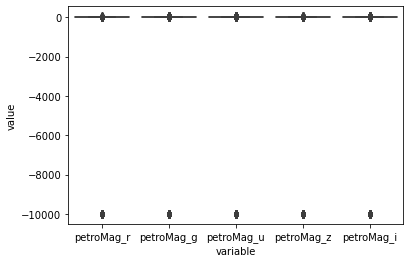

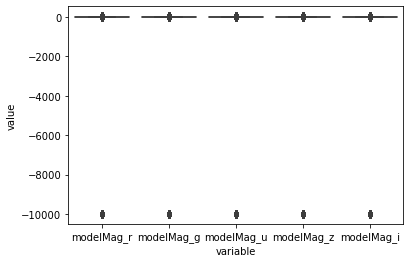

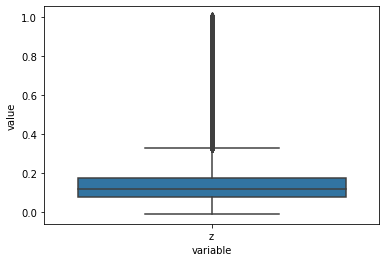

In [79]:
PETROMAG_LIST= ['petroMag_r','petroMag_g','petroMag_u','petroMag_z','petroMag_i']
MODELMAG_LIST= ['modelMag_r','modelMag_g','modelMag_u','modelMag_z','modelMag_i']

def boxplot_col(dataframe, columns_list):
    sns.boxplot(x="variable", y="value", data=pd.melt(dataframe[columns_list]))
    plt.show()
        
boxplot_col(dd_mag_rad, PETROMAG_LIST)
boxplot_col(dd_mag_rad, MODELMAG_LIST)
boxplot_col(dd_mag_rad, ['z'])

(863993, 31)


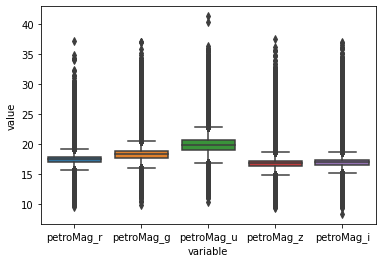

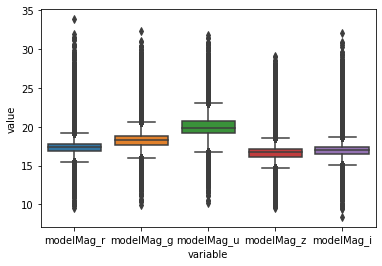

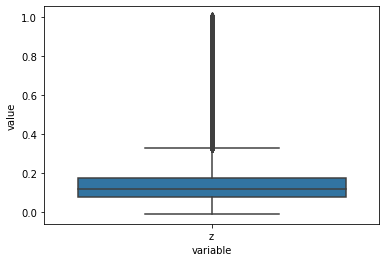

In [80]:
columns = dd_mag_rad.columns
dd_mag_rad = np.where(dd_mag_rad <= -9999, np.nan, dd_mag_rad)
dd_mag_rad = pd.DataFrame(dd_mag_rad)
dd_mag_rad.columns = columns 

dd_mag_rad = dd_mag_rad.dropna()
print(dd_mag_rad.shape)

boxplot_col(dd_mag_rad, PETROMAG_LIST)
boxplot_col(dd_mag_rad, MODELMAG_LIST)
boxplot_col(dd_mag_rad, ['z'])

Filas eliminadas 120867
86.01065054925213 %


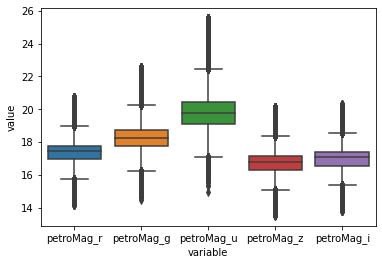

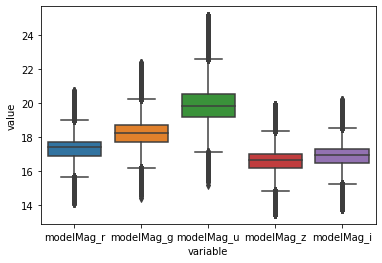

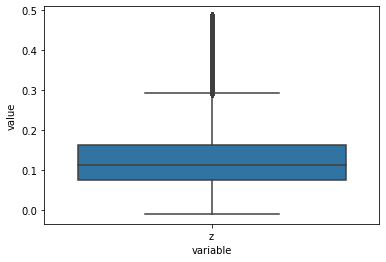

In [90]:
from scipy import stats

dd_mag_rad_no_outliers= dd_mag_rad[(np.abs(stats.zscore(dd_mag_rad)) < 3).all(axis=1)]
print('Filas eliminadas', dd_mag_rad.shape[0] - dd_mag_rad_no_outliers.shape[0])
print(dd_mag_rad_no_outliers.shape[0]/dd_mag_rad.shape[0]*100,'%')

boxplot_col(dd_mag_rad_no_outliers, PETROMAG_LIST)
boxplot_col(dd_mag_rad_no_outliers, MODELMAG_LIST)
boxplot_col(dd_mag_rad_no_outliers, ['z'])

In [91]:
display(dd_mag_rad.describe())
dd_mag_rad_no_outliers.describe()

,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,...,expRad_g,expRad_r,expRad_i,expRad_z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z,z
count,863993.000000,863993.000000,863993.000000,863993.000000,863993.000000,863993.000000,863993.000000,863993.000000,863993.000000,863993.000000,...,863993.000000,863993.000000,863993.000000,863993.000000,863993.000000,863993.000000,863993.000000,863993.000000,863993.000000,863993.000000
mean,20.122541,18.372952,17.407568,16.966049,16.664264,20.085721,18.430487,17.474008,17.056549,16.813170,...,2.541142,2.326084,2.203404,2.003836,0.148093,0.115393,0.079828,0.059321,0.044124,0.146665
std,1.660455,1.325300,1.108581,1.072128,1.069073,1.818237,1.378300,1.099984,1.087961,1.115659,...,2.346502,2.072713,2.058421,1.910480,0.175973,0.137117,0.094857,0.070489,0.052431,0.112969
min,10.170250,9.897096,9.474476,8.364965,9.563122,10.324730,9.895892,9.468501,8.364849,9.412460,...,0.000000,0.000000,0.000000,0.000000,0.012519,0.009755,0.006748,0.005015,0.003730,-0.011088
25%,19.136750,17.662740,16.867200,16.454830,16.146080,19.083540,17.708180,16.946540,16.554990,16.296700,...,1.254501,1.210598,1.155831,1.008123,0.079347,0.061827,0.042771,0.031784,0.023641,0.073795
50%,19.879430,18.257220,17.414080,16.989320,16.683930,19.796820,18.294750,17.484330,17.082170,16.817840,...,1.909551,1.805506,1.611190,1.496220,0.118161,0.092071,0.063694,0.047331,0.035206,0.115355
75%,20.718340,18.819730,17.780390,17.367350,17.111230,20.608170,18.861890,17.815690,17.423750,17.225310,...,3.148663,2.892517,2.724626,2.426159,0.176286,0.137361,0.095026,0.070614,0.052524,0.175229
max,31.771320,32.296770,33.845670,32.101780,29.183740,41.270800,36.986320,37.200850,37.010750,37.487490,...,123.662600,59.564220,59.372280,63.406430,28.182430,21.959560,15.191520,11.288930,8.396889,1.002166


,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,...,expRad_g,expRad_r,expRad_i,expRad_z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z,z
count,743126.000000,743126.000000,743126.000000,743126.000000,743126.000000,743126.000000,743126.000000,743126.000000,743126.000000,743126.000000,...,743126.000000,743126.000000,743126.000000,743126.000000,743126.000000,743126.000000,743126.000000,743126.000000,743126.000000,743126.000000
mean,19.947457,18.266238,17.338703,16.905670,16.607246,19.901512,18.311822,17.406018,16.992769,16.740996,...,2.336152,2.146047,2.025545,1.844372,0.140461,0.109446,0.075714,0.056264,0.041850,0.133616
std,1.268861,1.061926,0.890939,0.864444,0.877345,1.316705,1.062672,0.874278,0.848640,0.862138,...,1.382874,1.229326,1.170824,1.087481,0.090794,0.070746,0.048942,0.036369,0.027052,0.087645
min,15.156120,14.410440,14.097680,13.749890,13.457330,14.965410,14.445610,14.175810,13.792730,13.485630,...,0.000000,0.000000,0.000000,0.000000,0.012519,0.009755,0.006748,0.005015,0.003730,-0.010482
25%,19.156863,17.680500,16.877742,16.461230,16.149260,19.106020,17.725820,16.958482,16.562133,16.297650,...,1.268453,1.226318,1.184479,1.021158,0.079044,0.061591,0.042608,0.031662,0.023551,0.075361
50%,19.824490,18.223450,17.386880,16.960810,16.653555,19.750990,18.260650,17.457425,17.054185,16.786545,...,1.916704,1.823787,1.635254,1.506314,0.117309,0.091406,0.063234,0.046990,0.034952,0.113137
75%,20.540150,18.693250,17.717577,17.297890,17.021630,20.455350,18.734718,17.766100,17.363700,17.131350,...,3.054492,2.821519,2.604107,2.378792,0.174034,0.135606,0.093812,0.069712,0.051853,0.162296
max,25.103880,22.348790,20.716090,20.178300,19.871300,25.540340,22.564770,20.772510,20.311860,20.159280,...,9.557880,8.541166,8.358070,7.671522,0.676011,0.526744,0.364399,0.270787,0.201416,0.485557
